In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
var_with_missing = [i for i in df.columns if df[i].isnull().mean()>0]
var_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
df[var_with_missing].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [8]:
a = df[var_with_missing].isnull().mean()
a = pd.DataFrame(a.reset_index())
a.columns = ['varaibles' , 'missing percentages']
a.sort_values(by = 'missing percentages' , inplace=True , ascending = True)
a

,varaibles,missing percentages
9,Electrical,0.000685
2,MasVnrType,0.005479
3,MasVnrArea,0.005479
4,BsmtQual,0.025342
5,BsmtCond,0.025342
7,BsmtFinType1,0.025342
6,BsmtExposure,0.026027
8,BsmtFinType2,0.026027
15,GarageCond,0.055479
14,GarageQual,0.055479


In [9]:
0.995205 > 0.05

True

In [10]:
# If we want to apply cca the missing percentage of the column should be less than 0.05

In [11]:
var_less_zero = [j for j in df.columns if df[j].isnull().mean()<0.05]
var_less_zero

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [12]:
df[var_less_zero].head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
data_cca = df[var_less_zero].dropna()

In [14]:
df.shape , data_cca.shape

((1460, 81), (1412, 70))

In [15]:
df[var_less_zero].dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 70, dtype: object

In [16]:
numerical = df[var_less_zero].select_dtypes(exclude = 'object')

In [17]:
numerical.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Numarical Data 

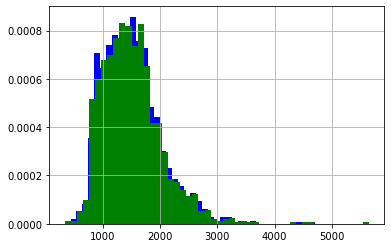

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['GrLivArea'].hist(bins = 50 , density = True, color = 'b', ax = ax)
df['GrLivArea'].hist(bins = 50 , density = True , color = 'g', ax = ax)
plt.show()

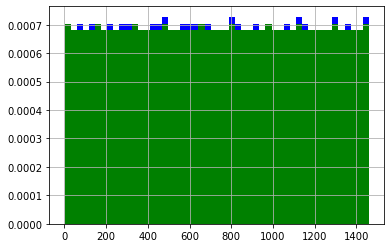

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['Id'].hist(bins = 50 , density = True, color = 'b', ax = ax)
df['Id'].hist(bins = 50 , density = True , color = 'g', ax = ax)
plt.show()

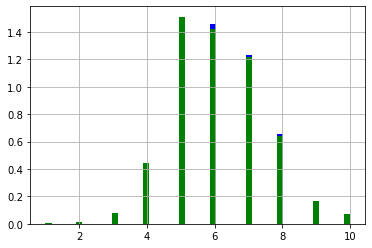

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['OverallQual'].hist(bins = 50 , density = True, color = 'b', ax = ax)
df['OverallQual'].hist(bins = 50 , density = True , color = 'g', ax = ax)
plt.show()

# Distribution

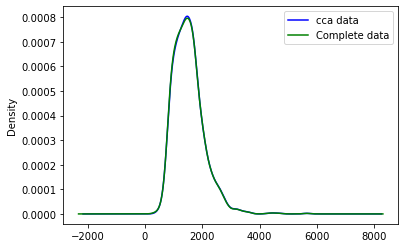

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['GrLivArea'].plot(kind='kde', color = 'b' ,ax =ax , label = 'cca data')
df['GrLivArea'].plot(kind = 'kde',color='g',ax=ax, label = 'Complete data')
plt.legend(loc=0)
plt.show()

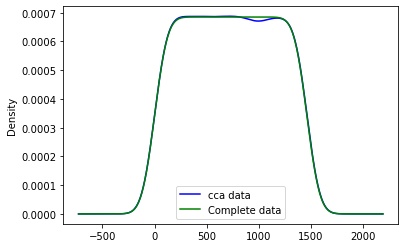

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['Id'].plot(kind='kde', color = 'b' ,ax =ax , label = 'cca data')
df['Id'].plot(kind = 'kde',color='g',ax=ax, label = 'Complete data')
plt.legend(loc=0)
plt.show()

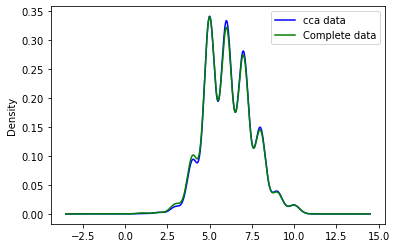

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data_cca['OverallQual'].plot(kind='kde', color = 'b' ,ax =ax , label = 'cca data')
df['OverallQual'].plot(kind = 'kde',color='g',ax=ax, label = 'Complete data')
plt.legend(loc=0)
plt.show()

# For Categorical Varaible

In [24]:
categorical = df[var_less_zero].select_dtypes(include = 'object')

In [25]:
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
categorical['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [27]:
def categorical_checking(df,data_cca,var):
    anil = pd.concat([
        df[var].value_counts() / len(df),
        data_cca[var].value_counts() / len (data_cca)
    ],axis = 1)
    anil.columns = ['Normal Data' , 'Complete Data']
    return anil

In [28]:
categorical_checking(df,data_cca,'MSZoning')

,Normal Data,Complete Data
RL,0.788356,0.786827
RM,0.149315,0.151558
FV,0.044521,0.043909
RH,0.010959,0.010623
C (all),0.006849,0.007082


In [29]:
categorical_checking(df,data_cca,'LotShape')

,Normal Data,Complete Data
Reg,0.633562,0.627479
IR1,0.331507,0.337110
IR2,0.028082,0.028329
IR3,0.006849,0.007082


In [30]:
categorical_checking(df,data_cca, 'Street')

,Normal Data,Complete Data
Pave,0.99589,0.995751
Grvl,0.00411,0.004249


In [31]:
categorical_checking(df,data_cca, 'LandContour')

,Normal Data,Complete Data
Lvl,0.897945,0.897309
Bnk,0.043151,0.043201
HLS,0.034247,0.035411
Low,0.024658,0.024079


In [32]:
categorical_checking(df,data_cca, 'Utilities')

,Normal Data,Complete Data
AllPub,0.999315,0.999292
NoSeWa,0.000685,0.000708


In [33]:
categorical_checking(df,data_cca,'LotConfig' )

,Normal Data,Complete Data
Inside,0.720548,0.718839
Corner,0.180137,0.181303
CulDSac,0.064384,0.064448
FR2,0.032192,0.032578
FR3,0.002740,0.002833


In [34]:
categorical_checking(df,data_cca,'LandSlope' )

,Normal Data,Complete Data
Gtl,0.946575,0.945467
Mod,0.044521,0.045326
Sev,0.008904,0.009207


In [35]:
categorical_checking(df,data_cca,'Neighborhood' )

,Normal Data,Complete Data
NAmes,0.154110,0.152266
CollgCr,0.102740,0.104816
OldTown,0.077397,0.078612
Edwards,0.068493,0.063031
Somerst,0.058904,0.058782
Gilbert,0.054110,0.054533
NridgHt,0.052740,0.053116
Sawyer,0.050685,0.050992
NWAmes,0.050000,0.051700
SawyerW,0.040411,0.038244


In [36]:
categorical_checking(df,data_cca, 'Condition1')

,Normal Data,Complete Data
Norm,0.863014,0.864023
Feedr,0.055479,0.053116
Artery,0.032877,0.033286
RRAn,0.017808,0.018414
PosN,0.013014,0.013456
RRAe,0.007534,0.007082
PosA,0.005479,0.005666
RRNn,0.003425,0.003541
RRNe,0.001370,0.001416
